In [1]:
import matplotlib.pyplot as plt
import json
import os

### 精度の推移

In [14]:
# 従来方法の評価対象logの読み込み
eval_list = ["eval" + str(i) for i in range(4, 9)]
model_list = ["v" + str(i) for i in range(1, 21)]
conventional_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    conventional_accs.append(accs)

In [15]:
# 提案方法の評価対象logの読み込み
eval_list = ["eval" + str(i) for i in range(5, 10)]
model_list = ["v" + str(i) for i in range(1, 21)]
proposal_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    proposal_accs.append(accs)

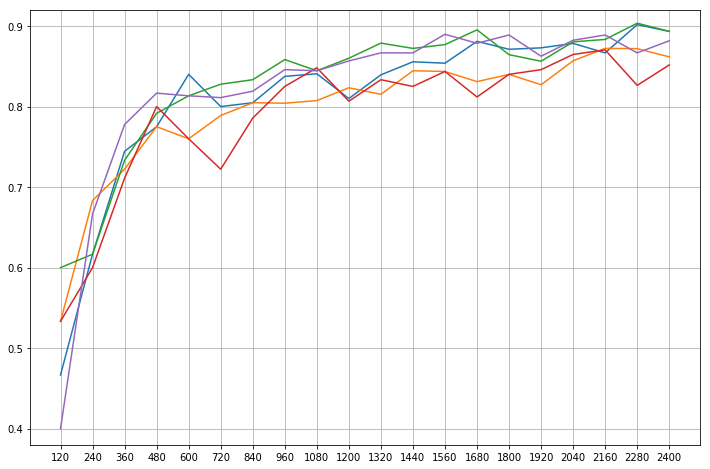

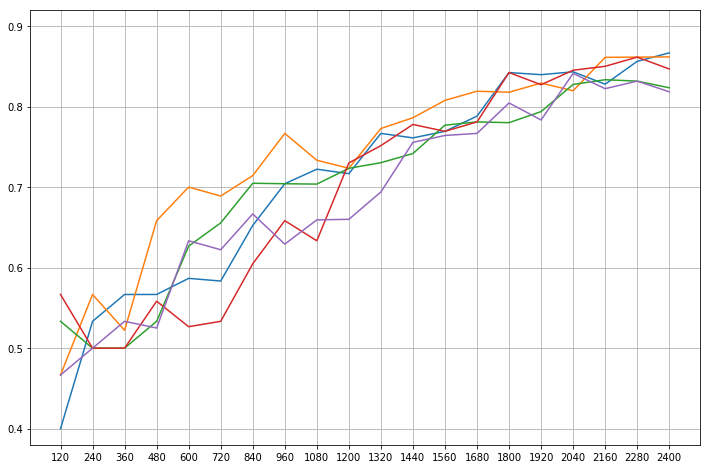

In [17]:
# 従来方法の精度推移の可視化
xlist = list(range(1,21))
ylists = conventional_accs

fig1 = plt.figure(figsize=(12,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.grid(True)

# 提案方法の精度推移の可視化
xlist = list(range(1,21))
ylists = proposal_accs

fig2 = plt.figure(figsize=(12,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.grid(True)

### 収束速度の推移

In [18]:
# 従来方法の収束速度の読み込み
eval_list = ["eval" + str(i) for i in range(4, 9)]
model_list = ["v" + str(i) for i in range(1, 21)]
conv_train_err_speeds = []
conv_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    conv_train_err_speeds.append(train_err_speeds)
    conv_test_err_speeds.append(test_err_speeds)

In [19]:
# 提案方法の収束速度の読み込み
eval_list = ["eval" + str(i) for i in range(5, 10)]
model_list = ["v" + str(i) for i in range(1, 21)]
prop_train_err_speeds = []
prop_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    prop_train_err_speeds.append(train_err_speeds)
    prop_test_err_speeds.append(test_err_speeds)

In [20]:
# ymaxとyminの算出
def cal_range(lists1, lists2):
    ymax = lists1[0][0]
    ymin = lists1[0][0]
    
    for list1, list2 in zip(lists1, lists2):
        list_max = max([max(list1), max(list2)])
        if ymax < list_max :
            ymax = list_max
        list_min = min([min(list1), min(list2)])
        if ymin > list_min:
            ymin = list_min
            
    return ymax + 5, ymin - 5

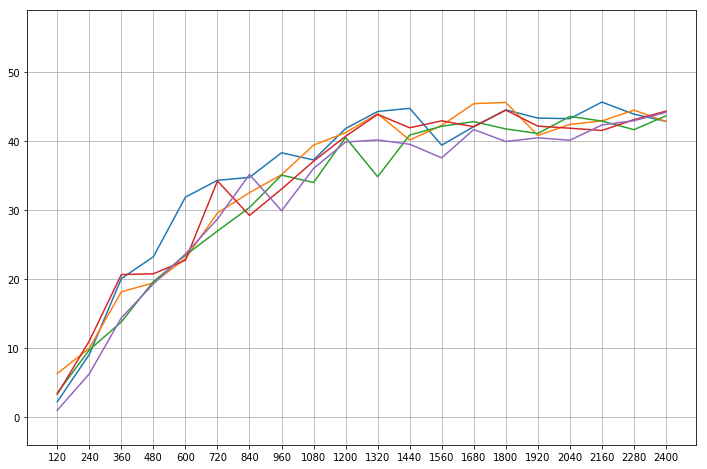

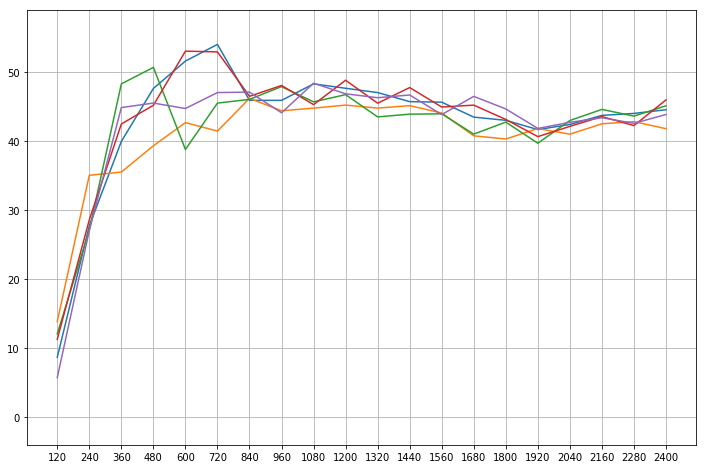

In [21]:
# 訓練誤差収束速度の推移の可視化

ymax, ymin = cal_range(conv_train_err_speeds, prop_train_err_speeds)

# 従来方法
xlist = list(range(1,21))
ylists = conv_train_err_speeds

fig1 = plt.figure(figsize=(12,8))
plt.ylim(ymin, ymax)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.grid(True)

# 提案方法
xlist = list(range(1,21))
ylists = prop_train_err_speeds

fig2 = plt.figure(figsize=(12,8))
plt.ylim(ymin, ymax)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.grid(True)

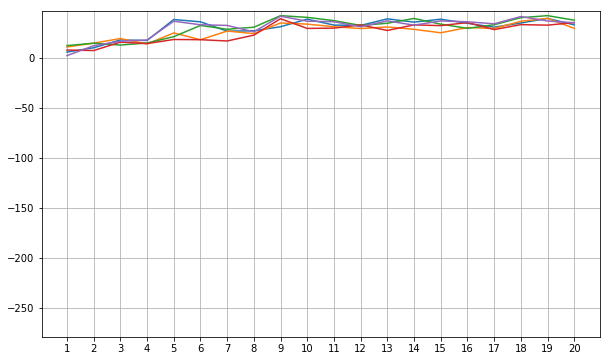

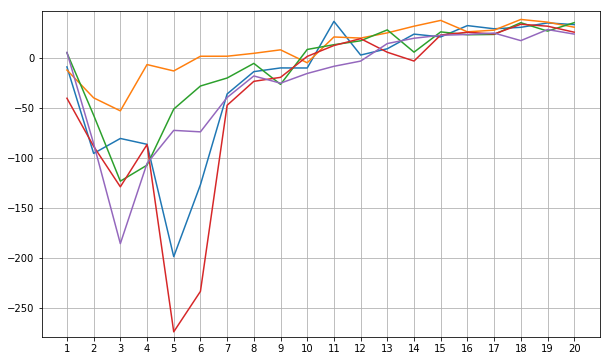

In [15]:
# 汎化誤差収束速度の推移の可視化

ymax, ymin = cal_range(conv_test_err_speeds, prop_test_err_speeds)

# 従来方法
xlist = list(range(1,21))
ylists = conv_test_err_speeds

fig1 = plt.figure(figsize=(10,6))
plt.ylim(ymin, ymax)
plt.xticks(xlist, xlist)
plt.plot(xlist, ylists[0])
plt.plot(xlist, ylists[1])
plt.plot(xlist, ylists[2])
plt.plot(xlist, ylists[3])
plt.plot(xlist, ylists[4])
plt.grid(True)

# 提案方法
xlist = list(range(1,21))
ylists = prop_test_err_speeds

fig2 = plt.figure(figsize=(10,6))
plt.ylim(ymin, ymax)
plt.xticks(xlist, xlist)
plt.plot(xlist, ylists[0])
plt.plot(xlist, ylists[1])
plt.plot(xlist, ylists[2])
plt.plot(xlist, ylists[3])
plt.plot(xlist, ylists[4])
plt.grid(True)